<a href="https://colab.research.google.com/github/Nakdimon/animalClassificationCNN/blob/main/cnnImplAnimals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, InputLayer, BatchNormalization
from keras_preprocessing.image import ImageDataGenerator
from skimage.io import imread_collection
from skimage import io, color
from skimage.transform import resize
from matplotlib import pyplot as plt

In [2]:
# Connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# Collecting Images
zebraImages = imread_collection('/content/drive/MyDrive/dataset1/zebra/*.*')
buffaloImages = imread_collection('/content/drive/MyDrive/dataset1/buffalo/*.*')
elephantImages = imread_collection('/content/drive/MyDrive/dataset1/elephant/*.*')
rhinoImages = imread_collection('/content/drive/MyDrive/dataset1/rhino/*.*')

In [37]:
# Implementing Resizer
def collectionResize(collection):
  resized = []
  for image in collection:
    resized.append(resize(image, (32, 32)))
  
  return resized

In [38]:
#resizing images to 32x32
rZebraImages = collectionResize(zebraImages)
rBuffaloImages = collectionResize(buffaloImages)
rElephantImages = collectionResize(elephantImages)
rRhinoImages = collectionResize(rhinoImages)

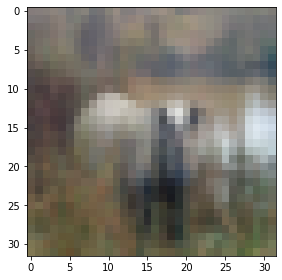

In [39]:
io.imshow(rRhinoImages[7])
plt.show()

In [40]:
# Defining class labels
ZEBRA_LABEL = 0
BUFFALO_LABEL = 1
ELEPHANT_LABEL = 2
RHINO_LABEL = 3

In [41]:
# Converting to nparray
rZebraImages = np.array(rZebraImages)
rBuffaloImages = np.array(rBuffaloImages)
rElephantImages = np.array(rElephantImages)
rRhinoImages = np.array(rRhinoImages)

In [42]:
X = np.concatenate((rZebraImages, rBuffaloImages, rElephantImages, rRhinoImages))
X.shape

(1504, 32, 32, 3)

In [166]:
X = X / 255

In [43]:
y = (np.concatenate((np.full((376, 1), 0),np.full((376, 1), 1), np.full((376, 1), 2), np.full((376, 1), 3)))).flatten()
y.shape

(1504,)

In [44]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=0, stratify=y)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=0)

In [45]:
x_train.shape

(1150, 32, 32, 3)

In [46]:
print(y_train)

[1 2 3 ... 0 0 0]


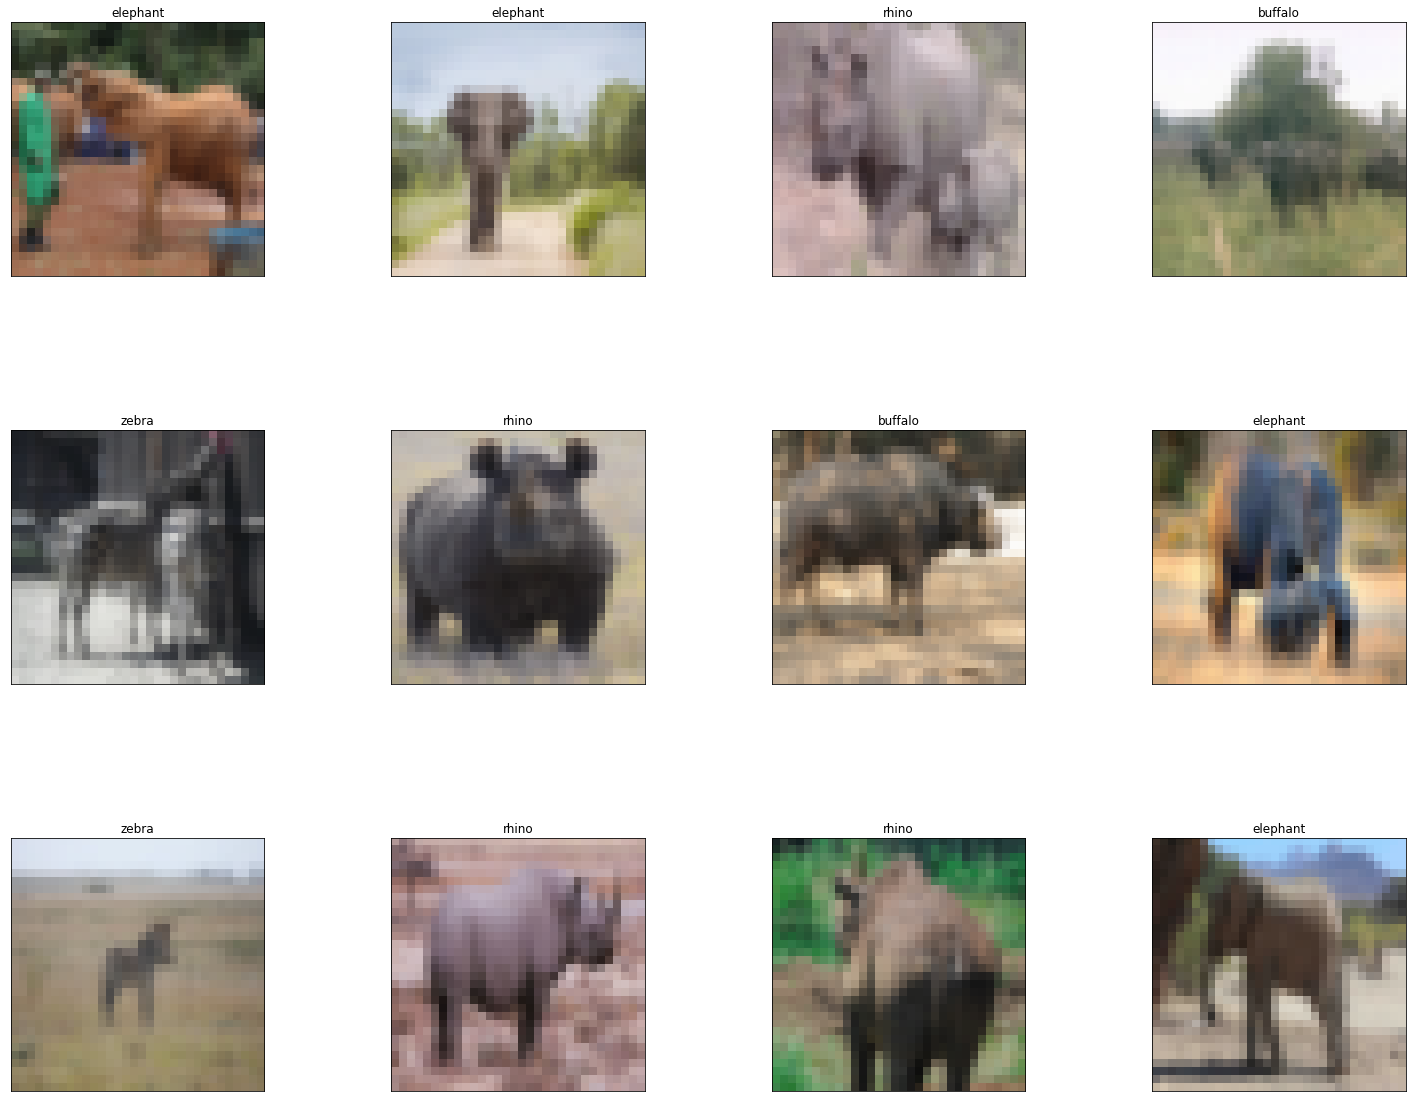

In [47]:
val = np.random.randint(0, len(X), 12)
r = 1
CATEGORIES = ['zebra', 'buffalo', 'elephant', 'rhino']
plt.figure(figsize=(25,20))
for value in val:
    plt.subplot(3,4,r)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    plt.xticks([]) , plt.yticks([])
    plt.title(CATEGORIES[y[value]])
    r += 1
    plt.imshow(X[value])
plt.show()

In [48]:
y_train = to_categorical(y_train, 4)
y_val = to_categorical(y_val, 4)
y_train.shape

(1150, 4)

In [95]:
#My model
model = Sequential()
model.add(Conv2D(32, (3,3), strides=(1,1), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=20, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=4, activation='softmax'))


In [89]:
model = Sequential()

model.add(Conv2D(128,3,padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D((4,4)))

model.add(Conv2D(64,3,padding='same', activation='relu'))
model.add(MaxPooling2D((4,4)))

model.add(Conv2D(32,3,padding='same', activation='relu'))
model.add(MaxPooling2D((4,4)))

model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4))

model.add(Dense(4, activation='softmax'))

ValueError: ignored

In [96]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [97]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_4 (Flatten)         (None, 2048)             

In [98]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

datagen.fit(x_train)

In [99]:
history = model.fit(datagen.flow(x_train,y_train,batch_size=32), validation_data=(x_val, y_val), epochs = 500)

Epoch 1/500
36/36 [==============================] - 1s 18ms/step - loss: 1.3911 - accuracy: 0.2504 - val_loss: 1.3863 - val_accuracy: 0.2734
Epoch 2/500
36/36 [==============================] - 1s 15ms/step - loss: 1.3862 - accuracy: 0.2583 - val_loss: 1.3849 - val_accuracy: 0.2031
Epoch 3/500
36/36 [==============================] - 1s 15ms/step - loss: 1.3829 - accuracy: 0.2443 - val_loss: 1.3711 - val_accuracy: 0.2656
Epoch 4/500
36/36 [==============================] - 1s 15ms/step - loss: 1.3673 - accuracy: 0.3078 - val_loss: 1.3284 - val_accuracy: 0.4375
Epoch 5/500
36/36 [==============================] - 1s 15ms/step - loss: 1.3459 - accuracy: 0.3313 - val_loss: 1.2448 - val_accuracy: 0.5234
Epoch 6/500
36/36 [==============================] - 1s 15ms/step - loss: 1.2819 - accuracy: 0.3800 - val_loss: 1.1643 - val_accuracy: 0.5391
Epoch 7/500
36/36 [==============================] - 1s 14ms/step - loss: 1.2236 - accuracy: 0.4443 - val_loss: 1.1222 - val_accuracy: 0.5703
Epoch 

In [100]:
model.save('content/model.h5')

In [101]:
y_pred = model.predict(x_test)

In [102]:
y_pred = np.argmax(y_pred, axis=1)

In [103]:
y_test.shape

(226,)

In [104]:
y_pred.shape

(226,)

In [105]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6061946902654868


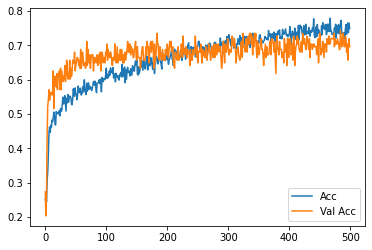

In [106]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Acc', 'Val Acc'])

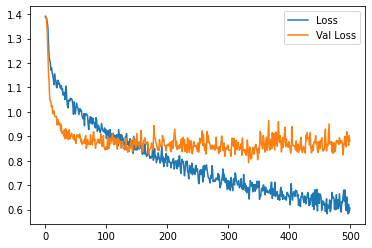

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val Loss'])